In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
import seaborn as sns

In [3]:
# Read the column description and ensure you understand each attribute well
data = pd.read_csv('Bank_Personal_Loan_Modelling.csv')
data.columns = ["ID","Age","Experience","Income","ZIPCode","Family","CCAvg","Education","Mortgage","PersonalLoan","SecuritiesAccount","CDAccount","Online","CreditCard"]

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                   5000 non-null int64
Age                  5000 non-null int64
Experience           5000 non-null int64
Income               5000 non-null int64
ZIPCode              5000 non-null int64
Family               5000 non-null int64
CCAvg                5000 non-null float64
Education            5000 non-null int64
Mortgage             5000 non-null int64
PersonalLoan         5000 non-null int64
SecuritiesAccount    5000 non-null int64
CDAccount            5000 non-null int64
Online               5000 non-null int64
CreditCard           5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [5]:
data.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [6]:
# Check whether any column has null values
data.apply(lambda x : sum(x.isnull()))
data.apply(lambda x : sum(x.isna()))

ID                   0
Age                  0
Experience           0
Income               0
ZIPCode              0
Family               0
CCAvg                0
Education            0
Mortgage             0
PersonalLoan         0
SecuritiesAccount    0
CDAccount            0
Online               0
CreditCard           0
dtype: int64

ID                   0
Age                  0
Experience           0
Income               0
ZIPCode              0
Family               0
CCAvg                0
Education            0
Mortgage             0
PersonalLoan         0
SecuritiesAccount    0
CDAccount            0
Online               0
CreditCard           0
dtype: int64

In [7]:
# View and understand the data
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIPCode,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
PersonalLoan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [8]:
# Finding the unique data
data.apply(lambda x: len(x.unique()))

ID                   5000
Age                    45
Experience             47
Income                162
ZIPCode               467
Family                  4
CCAvg                 108
Education               3
Mortgage              347
PersonalLoan            2
SecuritiesAccount       2
CDAccount               2
Online                  2
CreditCard              2
dtype: int64

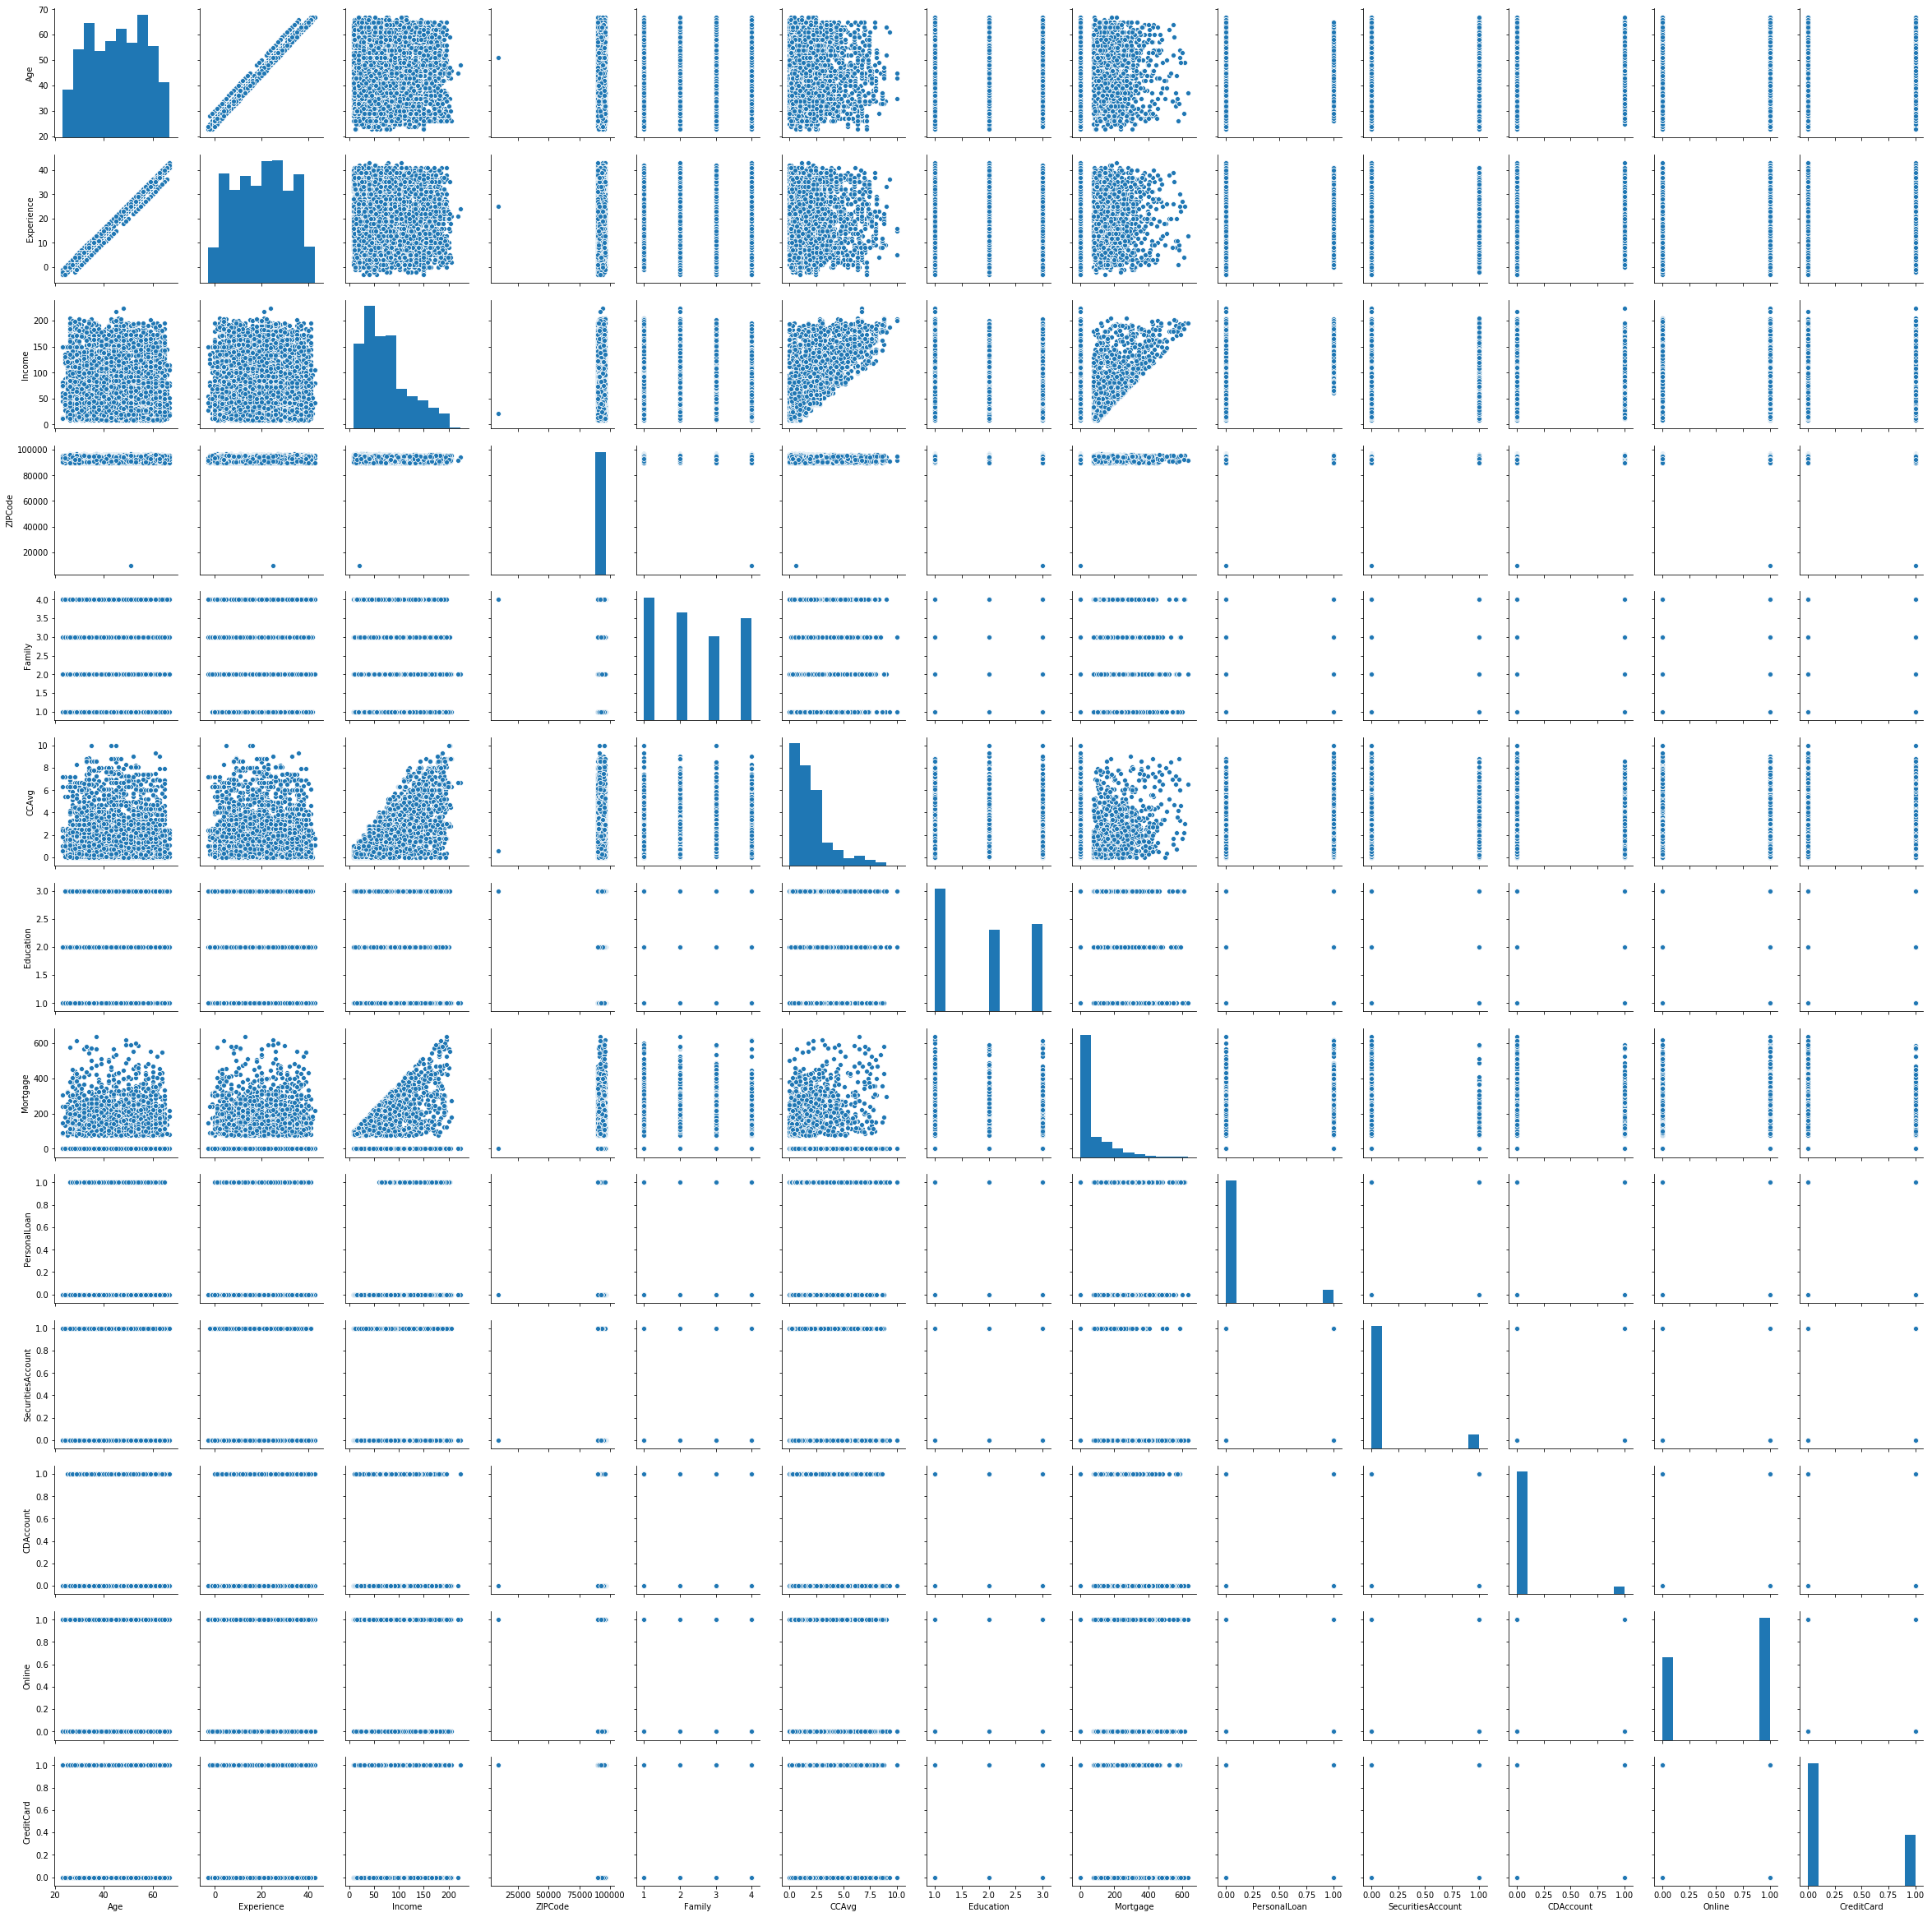

In [9]:
# Check the relation between each columns
sns.pairplot(data.iloc[:,1:])

C:\Users\rajan\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\rajan\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\rajan\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\rajan\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


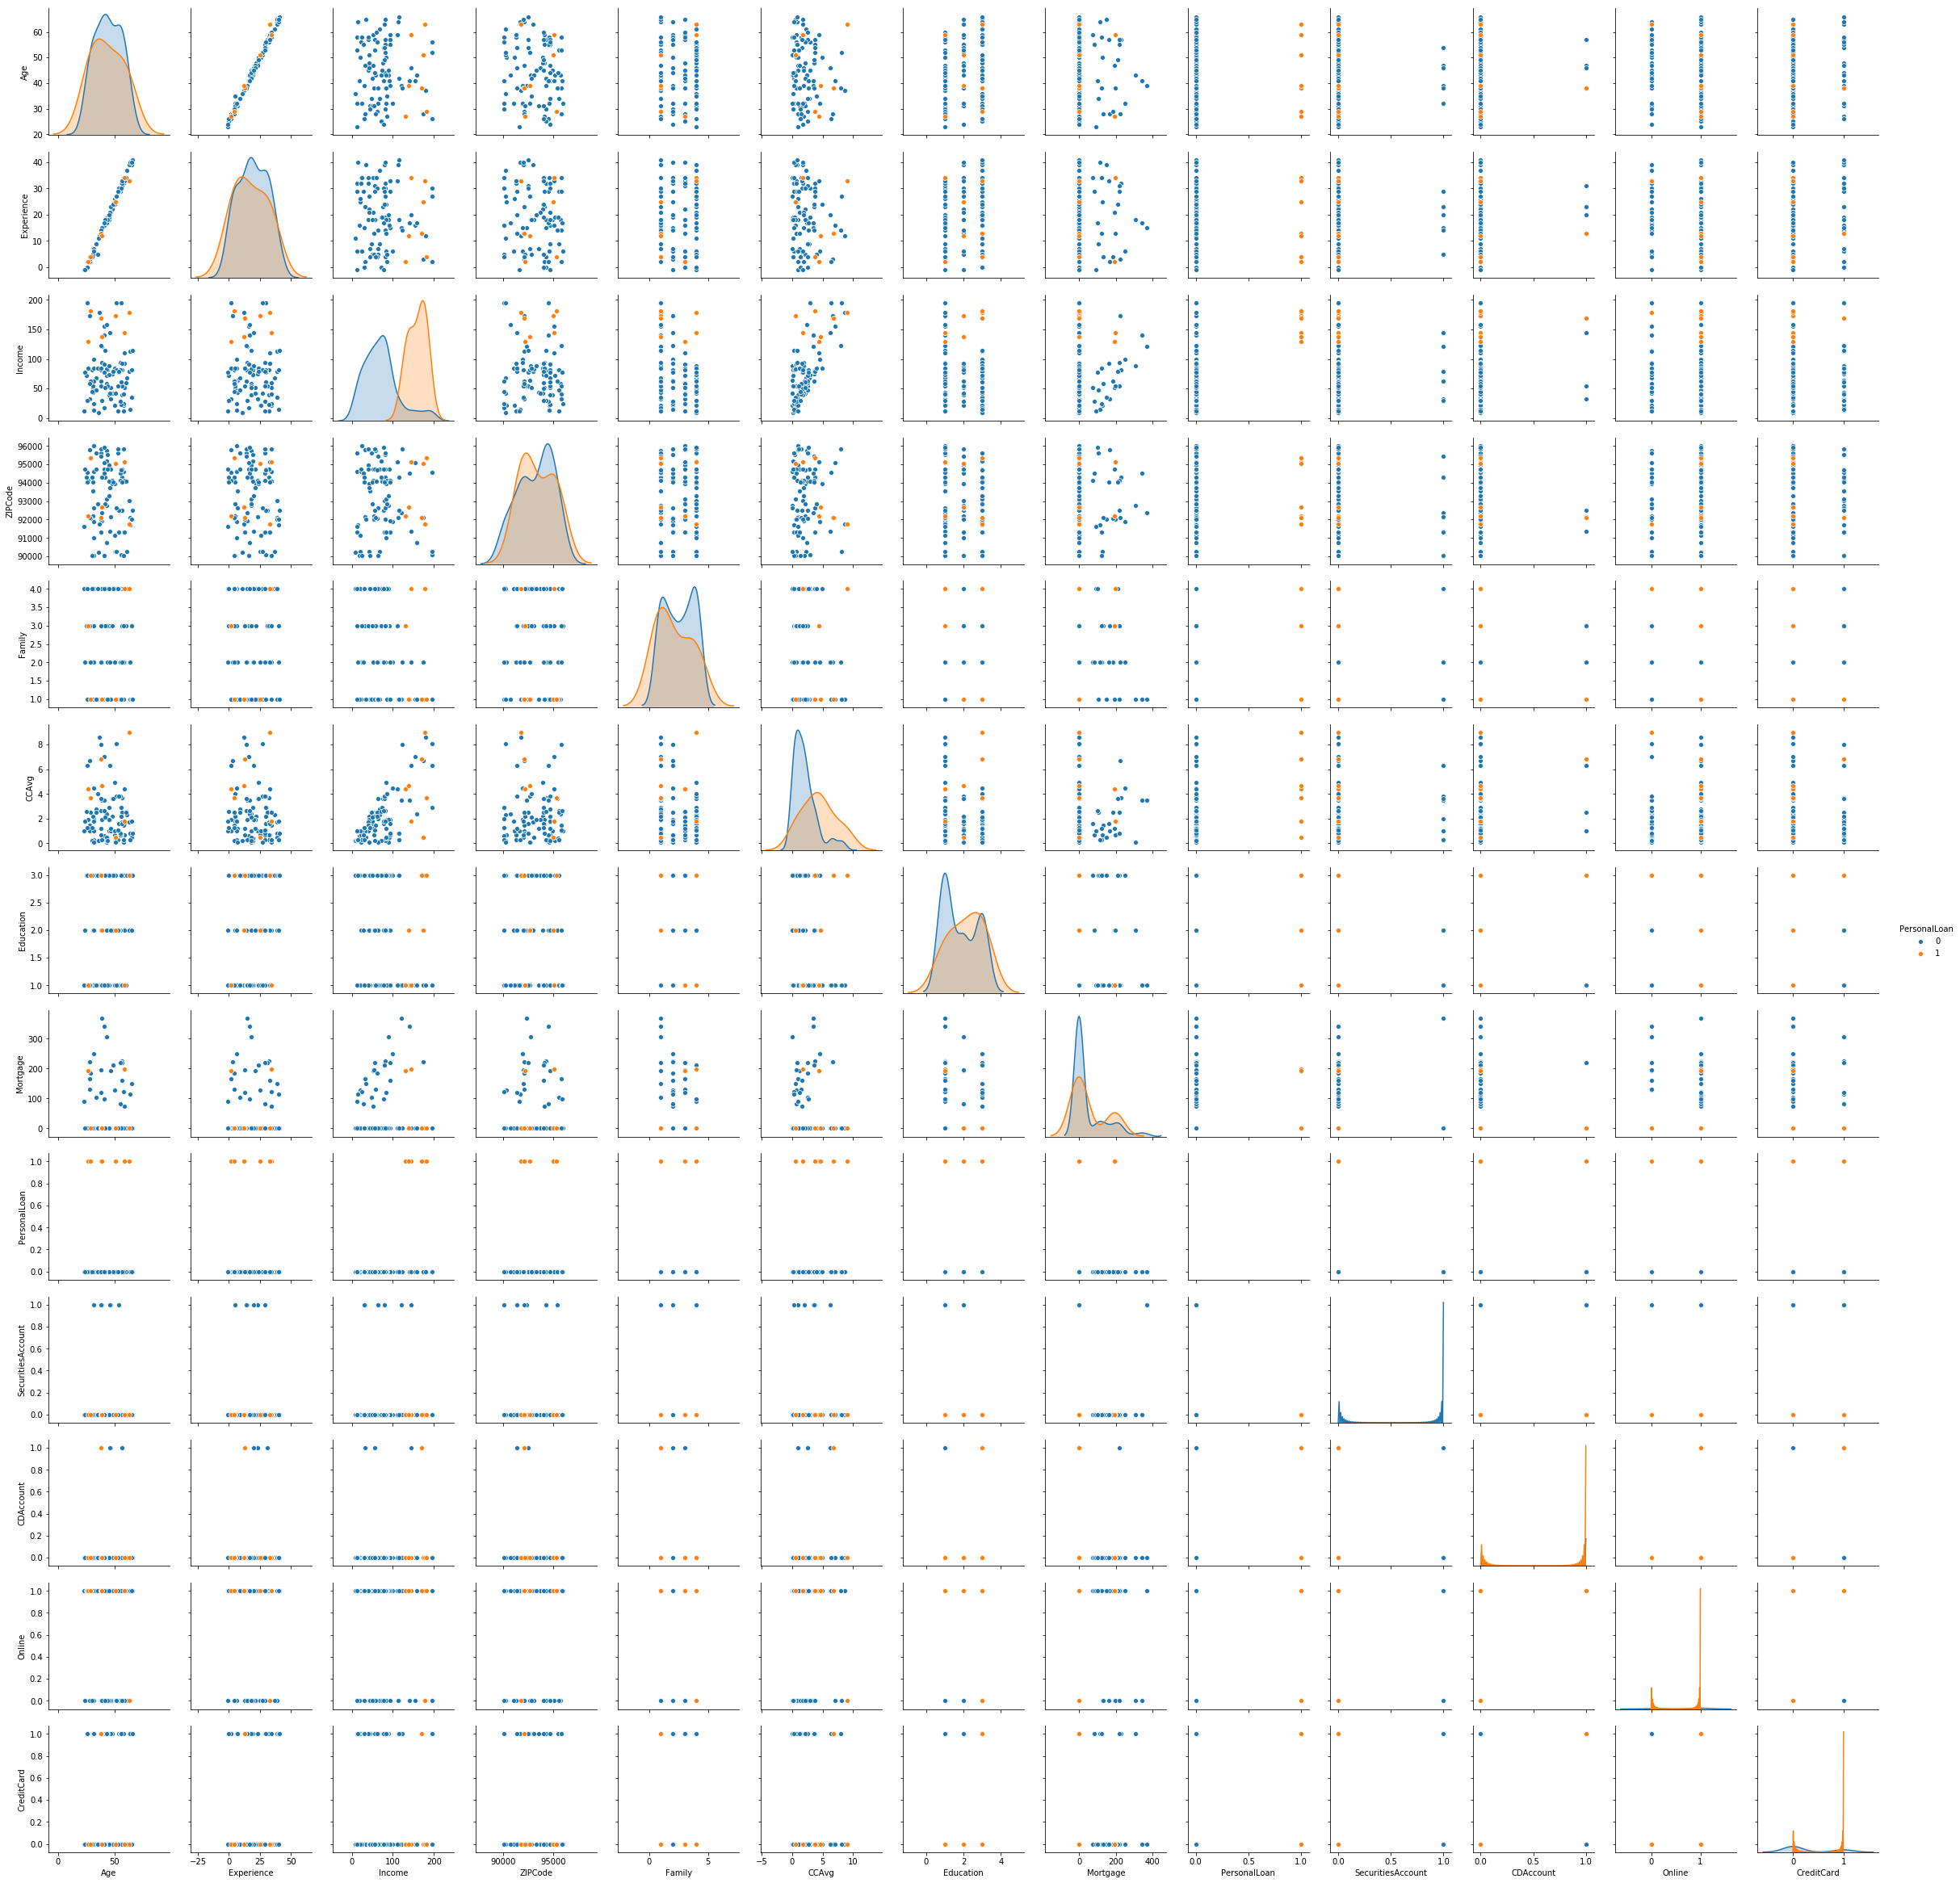

In [10]:
#sns.pairplot()
sns.pairplot(data.iloc[:,1:].sample(100),diag_kind='kde', hue="PersonalLoan")

# Observations:
    * Age feature is normally distributed with majority of customers falling between 30 years and 60 years of age which shows mean is almost equal to median
    * Experience is normally distributed with more customer having experience starting from 8 years. Here the mean is equal to median. There are negative values in the Experience. This could be a data input error as in general it is not possible to measure negative years of experience. We can delete these values, because we have 3 or 4 records from the sample.
    * Income can be good predictor for the propensity to respond which shows distinct relationship of responders and non responders
    * CCAvg is also a right skewed variable and average spending is between 0K to 10K and majority spends less than 2.5K
    * Mortgage 70% of the individuals have a mortgage of less than 40K. However the max value is 635K. It has lot of sub groups of normally distributed for one of the class
    * The variables family and education are ordinal variables. The distribution of families are normal

# Data Cleaning

In [11]:
# Found some negative values on Experience column
data[data['Experience'] < 0]['Experience'].count()

52

In [12]:
#clean the negative variable
dfExp = data.loc[data['Experience'] >0]
negExp = data.Experience < 0
column_name = 'Experience'
mylist = data.loc[negExp]['ID'].tolist() # getting the customer ID who has negative experience

In [13]:
negExp.value_counts()


False    4948
True       52
Name: Experience, dtype: int64

In [14]:
for id in mylist:
    age = data.loc[np.where(data['ID']==id)]["Age"].tolist()[0]
    education = data.loc[np.where(data['ID']==id)]["Education"].tolist()[0]
    df_filtered = dfExp[(dfExp.Age == age) & (dfExp.Education == education)]
    exp = df_filtered['Experience'].median()
    data.loc[data.loc[np.where(data['ID']==id)].index, 'Experience'] = exp

In [15]:
data[data['Experience'] < 0]['Experience'].count()

0

In [16]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,4971.0,20.243211,11.359189,0.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIPCode,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
PersonalLoan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [17]:
## Here the target column is PersonalLoan

(array([4520.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         480.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

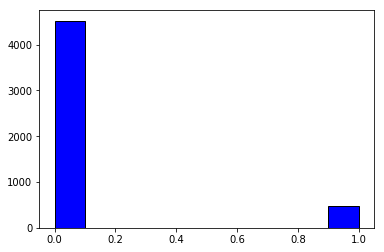

In [18]:
# Import the libraries
import matplotlib.pyplot as plt
import seaborn as sns

# matplotlib histogram
plt.hist(data['PersonalLoan'], color = 'blue', edgecolor = 'black')


In [19]:
# The frequency of Responder class 1 is very less in the data which could infuence the accuracy of model to be less

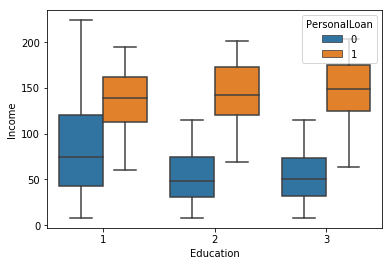

In [20]:
sns.boxplot(x='Education',y='Income',hue='PersonalLoan',data=data)

In [21]:
# Observation : It seems the customers whose education level is 1 is having more income. 
# However customers who has taken the personal loan have the same income levels

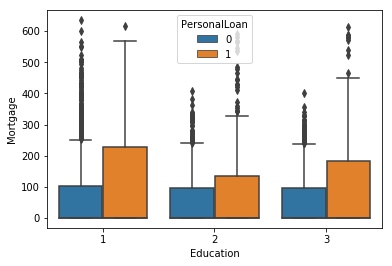

In [22]:
sns.boxplot(x="Education", y='Mortgage', hue="PersonalLoan", data=data)

In [23]:
# Inference : The customers who have personal loan have high mortgage

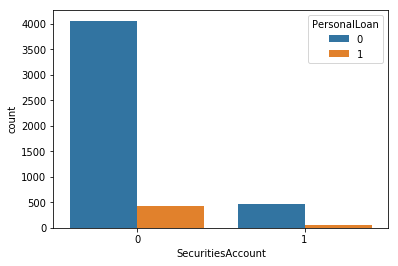

In [24]:
sns.countplot(x="SecuritiesAccount", data=data,hue="PersonalLoan")

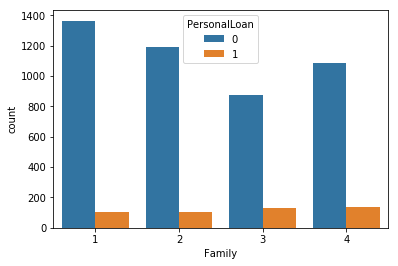

In [25]:
sns.countplot(x='Family',data=data,hue='PersonalLoan')


In [26]:
# Observations - Family size does not have any impact in personal loan

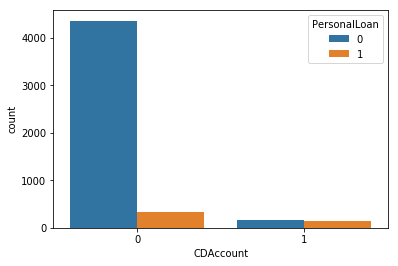

In [27]:
sns.countplot(x='CDAccount',data=data,hue='PersonalLoan')


In [28]:
# Observation: Customers who does not have CD account , does not have loan as well. This seems to be majority. But almost all customers who has CD account has loan as well

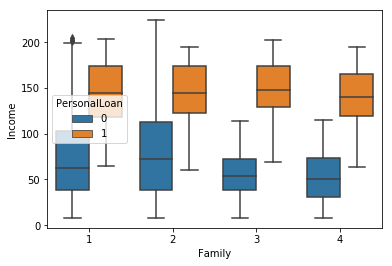

In [29]:
sns.boxplot(x=data.Family,y=data.Income,hue=data.PersonalLoan)

In [30]:
# Observation - Families with income less than 100K are less likely to take loan than families with high income

In [31]:
#Split data into train and test

from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(data.drop(['ID','Experience'], axis=1), test_size=0.3 , random_state=100)


In [32]:
train_labels = train_set.pop('PersonalLoan')
test_labels = test_set.pop('PersonalLoan')

In [33]:
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
#train_set, test_set, train_labels, test_labels = train_test_split(X, Y, test_size=0.30, random_state=1)

# Invoking the NB Gaussian function to create the model
# fitting the model in the training data set
model_gnb = GaussianNB()
model_gnb.fit(train_set, train_labels)

model_gnb.score(train_set , train_labels)      # performance on test data

test_pred = model_gnb.predict(test_set)

print(metrics.classification_report(test_labels, test_pred))

GaussianNB(priors=None, var_smoothing=1e-09)

0.8871428571428571

              precision    recall  f1-score   support

           0       0.95      0.92      0.94      1342
           1       0.47      0.61      0.53       158

   micro avg       0.89      0.89      0.89      1500
   macro avg       0.71      0.76      0.73      1500
weighted avg       0.90      0.89      0.89      1500



In [34]:
# Naive Bayes
from sklearn.model_selection import cross_val_score, cross_val_predict

y_predict_gnb = model_gnb.predict(test_set)
gnb_acc=metrics.accuracy_score(test_labels,y_predict_gnb)
print("Naive Bayes Accuracy is: ", gnb_acc)
print(metrics.confusion_matrix(test_labels, test_pred))
scores = cross_val_score(model_gnb, train_set, train_labels, cv=10)
print("Cross-validated scores:", scores , scores)
print("Average score:" , np.average(scores))

Naive Bayes Accuracy is:  0.8866666666666667
[[1234  108]
 [  62   96]]
Cross-validated scores: [0.9031339  0.87464387 0.89142857 0.89428571 0.86571429 0.87714286
 0.88285714 0.90857143 0.88538682 0.89398281] [0.9031339  0.87464387 0.89142857 0.89428571 0.86571429 0.87714286
 0.88285714 0.90857143 0.88538682 0.89398281]
Average score: 0.8877147405284941


In [35]:
# LogisticRegression
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression(solver='lbfgs' , max_iter=5000 , multi_class='multinomial')
model_lr.fit(train_set, train_labels)

model_lr.score(train_set , train_labels)      # performance on test data
test_pred = model_lr.predict(test_set)

print(metrics.classification_report(test_labels, test_pred))

lr_acc=metrics.accuracy_score(test_labels,y_predict_gnb)
print("Logistic Regression Accuracy is: ", lr_acc)

print(metrics.confusion_matrix(test_labels, test_pred))

scores = cross_val_score(model_lr, train_set, train_labels, cv=10)
print("Cross-validated scores:", scores , scores)
print("Average score:" , np.average(scores))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=5000, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

0.9431428571428572

              precision    recall  f1-score   support

           0       0.95      0.98      0.97      1342
           1       0.80      0.56      0.66       158

   micro avg       0.94      0.94      0.94      1500
   macro avg       0.87      0.77      0.81      1500
weighted avg       0.93      0.94      0.93      1500

Logistic Regression Accuracy is:  0.8866666666666667
[[1320   22]
 [  70   88]]
Cross-validated scores: [0.9002849  0.93447293 0.93428571 0.92285714 0.9        0.92285714
 0.93142857 0.92571429 0.95702006 0.90544413] [0.9002849  0.93447293 0.93428571 0.92285714 0.9        0.92285714
 0.93142857 0.92571429 0.95702006 0.90544413]
Average score: 0.9234364875281781


In [36]:
print("Logistic Regression score:" , model_lr.score(train_set , train_labels))
print("Nave Bayes score:" , model_gnb.score(train_set , train_labels))

Logistic Regression score: 0.9431428571428572
Nave Bayes score: 0.8871428571428571


In [37]:
# Compare Models
X=data.drop(['PersonalLoan','Experience','ID'],axis=1)
y=data.pop('PersonalLoan')

In [38]:
from sklearn import model_selection

C:\Users\rajan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\rajan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\rajan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\rajan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\rajan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

LR: 0.908800 (0.007756)
NB: 0.885600 (0.010385)


Text(0.5, 0.98, 'Algorithm Comparison')

{'whiskers': [<matplotlib.lines.Line2D at 0x2792582ae48>,
 'caps': [<matplotlib.lines.Line2D at 0x2792582f518>,
 'boxes': [<matplotlib.lines.Line2D at 0x2792582aa58>,
 'medians': [<matplotlib.lines.Line2D at 0x2792582fba8>,
 'fliers': [<matplotlib.lines.Line2D at 0x2792582fef0>,
 'means': []}

[Text(0, 0, 'LR'), Text(0, 0, 'NB')]

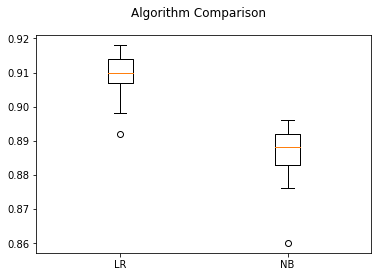

In [39]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('NB', GaussianNB()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=12345)
	cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [40]:
# Here Logistic Regression model seems like have the highest accuracy and we can choose that as our final model